In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imports import *
import staircase as sc
%matplotlib inline


In [2]:
df = pd.read_csv(r"..//data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)

vsteps = Steps.read_dataframe(df,'enter','leave')



C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


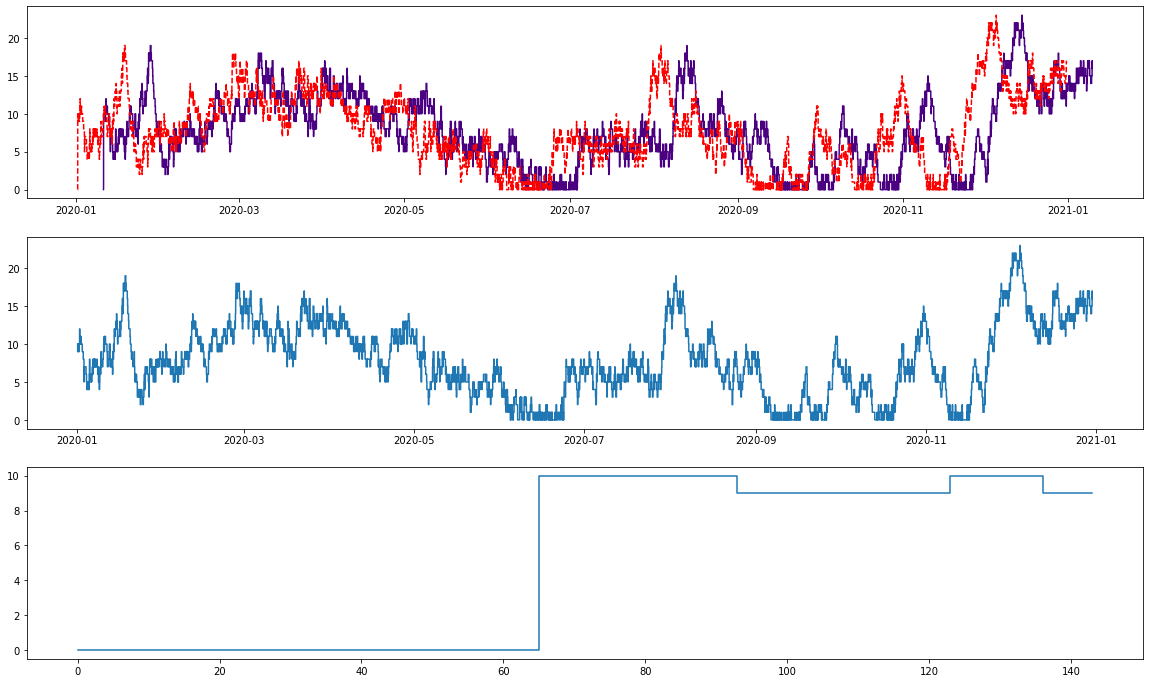

In [3]:
#tbase = Basis(Basis.tanh,52416)

p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,1,15), pd.Timedelta(minutes=1)).astype(pd.Timestamp)
px = [x.timestamp() for x in p]
fig,ax = plt.subplots(nrows=3,figsize=(20,12))

queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)
queue.plot(ax[1])
(vsteps>>pd.Timedelta(days=10)).plot(ax=ax[0],ts_grain=pd.Timedelta(minutes=1))
#s15 = (vsteps > 15)
#vsteps.reduce()
vsteps.plot(method='smooth',smooth_factor=10,ax=ax[0],color='r',linestyle='--')
#ax[2].step(px,vsteps.smooth_step_function(p,10) + 5*np.sin(np.multiply(0.000005*np.pi,px)))
#ax[2].step(p,vsteps[p])

ax[2].step(np.arange(len(vsteps[pd.Timestamp(2020,1,1):pd.Timestamp(2020,1,2):pd.Timedelta(minutes=10)])),vsteps[pd.Timestamp(2020,1,1):pd.Timestamp(2020,1,2):pd.Timedelta(minutes=10)])


In [4]:
tic = time.perf_counter()
#tbase = Basis(Basis.tanh,43980)
p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,1,7), pd.Timedelta(minutes=1)).astype(pd.Timestamp)

fig,ax = plt.subplots(nrows=4,figsize=(20,16))
#vsteps.rebase()
fstep = vsteps.step_function(p)
ax[0].step(p,fstep,where='post')
toc = time.perf_counter()

print(f'Run time: {toc - tic} seconds')
dfd = vsteps.to_dataframe()
dfd['cumsum'] = dfd.step.cumsum()
df2 = df.loc[df.leave <= pd.Timestamp('2020-01-07')]
queue = sc.Stairs(use_dates=True).layer(df2.enter, df2.leave)
queue.plot(ax[1])
# print(queue.median())
# print(queue.mean())
# print(queue.var())

# print(np.median(vsteps._cumsum))
# print(np.mean(vsteps._cumsum))
# print(np.var(vsteps._cumsum))
#med_q.plot(ax[1])

dfd.ts = dfd.ts.apply(pd.Timestamp)
dfdg = dfd.sort_values('ts').groupby('ts')['cumsum'].max()
dfdg.loc[dfdg.index < pd.Timestamp('2020-01-07')].plot(ax=ax[2],drawstyle="steps-post")

low_steps = (vsteps > 5)
ax0 = ax[0].twinx()
ax[0].step(p,low_steps.step_function(p),color='r',where='post')
ax[0].step(p,low_steps.smooth_step_function(p),color='g')


print(len(p))

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'time' is not defined

In [ ]:
d = vsteps._cummulative
np.mean(list(d.values()))
#dfd = pd.DataFrame.from_records(data,columns=['ts','step'])
#dfd

In [ ]:
def create_cumsum():
    

In [ ]:
%timeit vsteps.to_dict()

In [ ]:
len(low_steps.to_dict())

#sd[pd.Timestamp(2020,1,1)]

In [ ]:
a  = np.where(vsteps._steps==None,1,0)
a

In [ ]:
cs = np.cumsum([s.weight for s in vsteps._steps])
np.where(cs > 5, cs,0)

In [ ]:
vsteps.fstep_function([pd.Timestamp(2020,2,20,10,10)])

In [ ]:
vsteps._steps[np.where(vsteps._steps > pd.Timestamp(2020,1,1,10) & (vsteps._steps > pd.Timestamp(2020,1,1,10)))]

In [ ]:

#mbase = np.frompyfunc(mybase2,1,1)
tbase = Basis(Basis.sigmoid,5)


x = Step(3.75)
y = Step(5.6,6)
y2 = Step(8.2,8.8)
y3 = Step(9.2,9.8)

#y3.rebase()
z = Step(7.2)
q = Step(12)

p = Step(9,weight=-1)
p1 = Step(9.5,weight=-1)

ss1 = Steps()
ss1 = ss1.add([z,x,y])

ss2 = Steps()
ss2 = ss2.add([q,x,p])

s1 = sc.Stairs()
s1.layer(4)
s1.layer(5,6)
s1.layer(4)
s1.layer(7)
s1.layer(12)
s1.layer(9,value=-1)

ss3 = Steps().add([Step(4),Step(4),Step(5,6),Step(7),Step(12),Step(9,weight=-1)])

y4 = y2 << 0.3
ss3 = ss2 + ss1
ss4 = ss3+y2
ss4 += y3

ss5 = Steps().add([y2,y3])

yy =  y+y2+y3 + y4
#yy -=ss2
#yy.rebase(Basis(Basis.logit))
#ss4.rebase(tbase)
    
p = np.arange(2,13,0.01)

fig,ax = plt.subplots(nrows=6,figsize=(18,14))

ax[0].step(p,ss1[p])
ax[1].step(p,(ss2-yy-yy).step(p))
ax[2].step(p,ss3.step(p))
#s1.plot(ax[2],color='r')
ax[3].step(p,(ss4+ss3).step(p))
#ax[3].step(p,(ss4 > 0).step(p))
#ax[3].step(p,(ss4 > 2).step_function(p),color='r')
#ax[5].step(p,ss5.step_function(p))
#ax[5].step(p,(y4 << 4).step(p))
#ax[5].step(p,y4[p])
ax[5].step(p,yy.step(p))
ax[5].step(p,(yy-y4).step(p))

ax[4].step(p,y3.reflect().step(p))
print(y4[10:13:0.2])
print((y4)[10])

In [ ]:
import altair as alt

def createplot(smooth=True):    
    if smooth:
        source = pd.DataFrame({"x": p, "y": ss4.smooth_step(p,0.0005)})

        aplot = alt.Chart(source).mark_line(interpolate='step-before').encode(
            x='x',
            y='y',
            color=alt.value('red')
        )
        return aplot
    else:
        source = pd.DataFrame({"x": p, "y": ss4.step(p)})

        aplot = alt.Chart(source).mark_line(interpolate='step-before').encode(
            x='x',
            y='y',
            color=alt.value('blue')
        )
        return aplot        
    


smooth_steps = createplot()
steps = createplot(False)

alt.layer(
    smooth_steps,
    steps
).resolve_scale(color='independent').properties(width=1000,height=300).interactive()

#(smooth_steps + steps).properties(width=1000,height=300).interactive()

In [ ]:


fig, ax = plt.subplots(figsize=(16,8))

plt.step(p,ss1.step(p),label = "s1")
plt.step(p,ss2.step(p),label = "s2", linestyle="--", linewidth=3)
plt.step(p,ss3.step(p),label = "s3", linestyle="-", linewidth=2)
ax.legend()
plt.show()


In [ ]:
k = np.arange(1,5,None)
k

In [ ]:
x = Step(pd.Timestamp(2020,1,1,15,12))
y = Step(pd.Timestamp(2020,1,1,11,1))
z = Step(pd.Timestamp(2020,1,1,9,25))

na = np.array([x,y,z])
na

In [ ]:
fna = na[np.where(na > pd.Timestamp(2020,1,1,10))]
fna

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

p = np.arange(-2,5,0.5)

x = np.array([p]*3)
w = np.ones(3)
s = np.array([0.5,1,1.5])
#n = np.subtract(x,s)
plt.step(p,np.dot(np.heaviside(x.transpose() - s,1),w))


In [ ]:
p = np.arange(pd.Timestamp(2020,1,1,11), pd.Timestamp(2020,2,1), pd.Timedelta(minutes=1)).astype(pd.Timestamp)
pf = np.array([t.timestamp() for t in p])
pf[int(len(pf)/1.2)]

In [ ]:
s = [1579156200.0,1579596000.0,1580035800.0]

f = np.where(pf >= 1579156200.0, 1,0)
f = np.where(pf >= 1579156200.0, 1,0)
f2 = np.where(pf >= 1579596000.0, 1,0)
f3 = np.where(pf >= 1580035800.0, 1,0)

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
plt.step(p,np.sum([f,f2,f3],axis=0))

In [ ]:
import cupy as cp
x = cp.arange(6).reshape(2, 3).astype('f')

x.sum(axis=1)

In [ ]:
#[2, 3, 1, 2, 1, 2]
#[3.75, 5.6, 6, 7.2, 9, 12]

s1 = sc.Stairs()
s1.layer(4)
s1.layer(4)
s1.layer(5,6)
s1.layer(7)
s1.layer(12)
s1.layer(9,value=-1)

ss3 = Steps().add([Step(4),Step(4),Step(5,6),Step(7),Step(12),Step(9,weight=-1)])

s = Step(4,weight=2)
tbase = Basis(Basis.logit,1)
ss3.rebase()
#print(s.integrate(10,0))
print(Analysis.mean_integrate2(ss3))
#print(list(ss3._cummulative.keys()))

print(s1.integrate())

In [ ]:
# widths = np.subtract(cumulative.keys()[2:], cumulative.keys()[1:-1])
# heights = cumulative.values()[1:-1]
# area = np.multiply(widths, heights).sum()

# dd = vsteps._steps
# dcs = vsteps._cumsum
# ddk = [d.start_ts for d in dd]
# #ddv = [d. for d in dd]

# delta = np.subtract(ddk[2:],ddk[1:-1])

# #print(delta)
# #print(dcs)
# np.dot(dcs[1:-1],delta)/3600

vsteps.percentile(35)

In [ ]:
queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)
queue.percentile(35)